# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
# !pip install prophet

# prophet is already installed in the environment

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head(5))
display(df_mercado_trends.tail(5))

C:\Users\arnab\AppData\Local\Temp\ipykernel_9616\4129022834.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends = pd.read_csv(
C:\Users\arnab\AppData\Local\Temp\ipykernel_9616\4129022834.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: title={'center': 'Google Search Trends in Mercado for May-2020 '}, xlabel='Date', ylabel='Search Trends'>

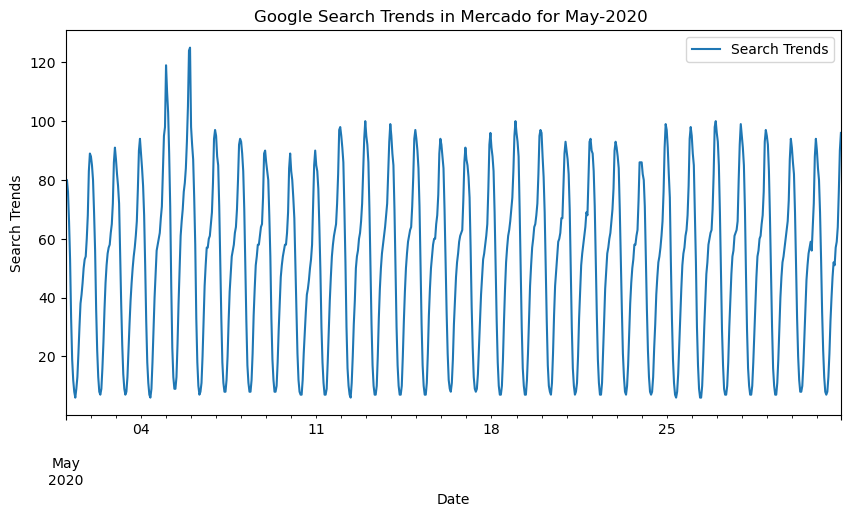

In [5]:
# Slice the DataFrame to just the month of May 2020
df_mercado_trends.loc['2020-05'].head()

# Plot to visualize the data for May 2020 using the plot function and xlabel
df_mercado_trends.loc['2020-05'].plot(title='Google Search Trends in Mercado for May-2020 ', 
                                      xlabel='Date',
                                      ylabel='Search Trends',
                                      figsize=[10, 5]

                                      )


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_mercado_trends.loc['2020-05'].sum()

# View the traffic_may_2020 value
print(traffic_may_2020)



Search Trends    38181
dtype: int64


In [7]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
print(median_monthly_traffic)


Search Trends    35172.5
dtype: float64


In [8]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
# Divide the may traffic total by the median monthly traffic
print (traffic_may_2020/median_monthly_traffic)

Search Trends    1.085536
dtype: float64


##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes it did increase for the month of May 2020.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

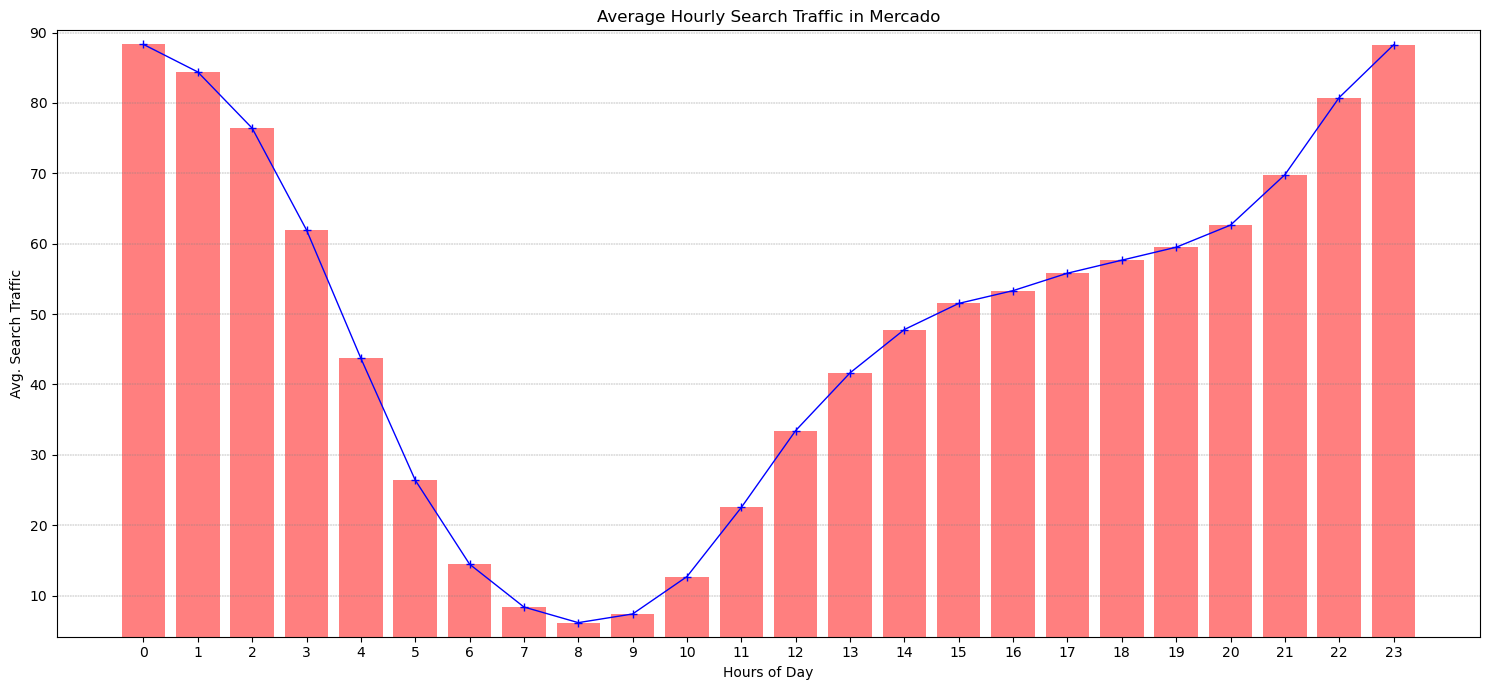

In [9]:
# Group the hourly search data to plot the average traffic by the hour of the day
hourly_mean_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()

# View the top rows of hourly_mean_traffic DataFrame
hourly_mean_traffic.head(5)

# Rename the index column to "Hours_of_Day"
hourly_mean_traffic.index.name = 'Hours_of_Day'

# View the top rows of hourly_mean_traffic DataFrame to confirm the Index name change
hourly_mean_traffic.head(5)


# Plot the average hourly search traffic using the plot function and xlabel
# Arnab: I have used both the bar & line plot to show the average hourly search traffic, 
# used xticks to show all the hours as the x-axis labels

plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
max_y_lim = hourly_mean_traffic['Search Trends'].max() + 2
min_y_lim = hourly_mean_traffic['Search Trends'].min() - 2
plt.ylim(min_y_lim, max_y_lim)
plt.bar(hourly_mean_traffic.index,  hourly_mean_traffic['Search Trends'], color='r', alpha=0.5, align="center")
plt.plot(hourly_mean_traffic.index, hourly_mean_traffic['Search Trends'], marker="+",color="blue", linewidth=1)

plt.xticks(hourly_mean_traffic.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.xlabel('Hours of Day')
plt.ylabel('Avg. Search Traffic')
plt.title('Average Hourly Search Traffic in Mercado')
plt.show()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

,Search Trends
Day_of_Week,
Monday,49.522813
Tuesday,50.571672
Wednesday,50.219604
Thursday,49.699661
Friday,48.621041
Saturday,45.125377
Sunday,43.151207


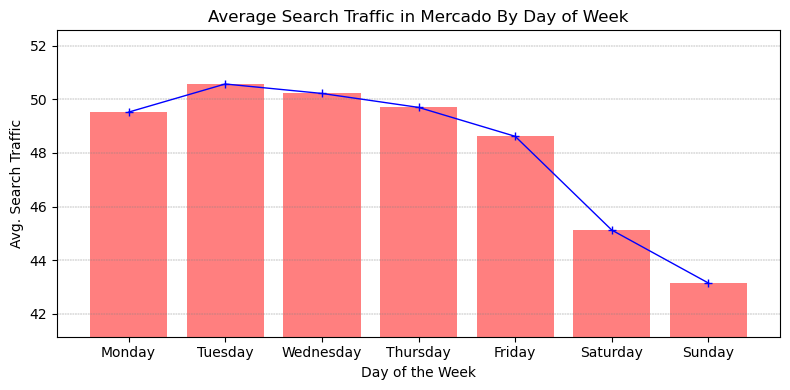

In [10]:
# Group the hourly search data to plot the average traffic by the day of week

# Arnab's Comment: In this dataframe, I used the day_name() function to plot the graph 
# instead of the dayofweek attribute to get the name of the day of the week
Avg_traffic_by_day_of_week = df_mercado_trends.groupby(df_mercado_trends.index.day_name()).mean()

# Rename the index column to "Day_of_Week"
Avg_traffic_by_day_of_week.index.name = 'Day_of_Week'

# View the top rows of Avg_traffic_by_day_of_week DataFrame to confirm the Index name change
Avg_traffic_by_day_of_week.head()


# Reindex the <day_of_week> dataframe to start from Monday
Avg_traffic_by_day_of_week = Avg_traffic_by_day_of_week.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

display(Avg_traffic_by_day_of_week)

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
max_y_lim = Avg_traffic_by_day_of_week['Search Trends'].max() + 2
min_y_lim = Avg_traffic_by_day_of_week['Search Trends'].min() - 2
plt.ylim(min_y_lim, max_y_lim)
plt.bar(Avg_traffic_by_day_of_week.index,  Avg_traffic_by_day_of_week['Search Trends'], color='r', alpha=0.5, align="center")
plt.plot(Avg_traffic_by_day_of_week.index, Avg_traffic_by_day_of_week['Search Trends'], marker="+",color="blue", linewidth=1)

plt.xticks(Avg_traffic_by_day_of_week.index)
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.xlabel('Day of the Week')
plt.ylabel('Avg. Search Traffic')
plt.title('Average Search Traffic in Mercado By Day of Week')
plt.show()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year
weekly_mean_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Rename column 'Search Trends' to Search_Trends
weekly_mean_traffic = weekly_mean_traffic.rename(columns={'Search Trends': 'Search_Trends'})

In [12]:
# Use Loc, idxmax, and idxmin to find the week with the highest and lowest average traffic
weekly_mean_traffic.loc[[ weekly_mean_traffic.Search_Trends.idxmax(), weekly_mean_traffic.Search_Trends.idxmin() ]]


,Search_Trends
week,
4,50.834821
35,44.452381


In [13]:
# Find the top-10 and bottom-10 weeks with highest and lowest average traffic
print(f'The top-10 weeks with highest average traffic are: \n{weekly_mean_traffic.nlargest(10, "Search_Trends")}')

print(f'The bottom-10 weeks with lowest average traffic are: \n{weekly_mean_traffic.nsmallest(10, "Search_Trends")}')

The top-10 weeks with highest average traffic are: 
      Search_Trends
week               
4         50.834821
8         50.763393
3         50.474702
7         50.160714
6         50.105655
5         50.084821
2         50.078869
11        49.866987
51        49.747024
47        49.480655
The bottom-10 weeks with lowest average traffic are: 
      Search_Trends
week               
35        44.452381
52        44.662202
1         44.924107
42        45.321429
19        45.372024
38        45.712798
41        45.808036
43        46.497024
13        47.102679
40        47.191964


<Axes: title={'center': 'Average Weekly Search Traffic in Mercado'}, xlabel='Week of the Year', ylabel='Average Search Traffic'>

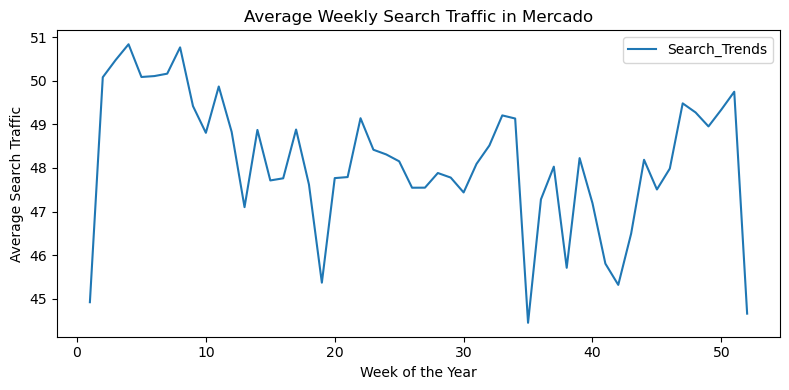

In [14]:
# Plot the average weekly search traffic
weekly_mean_traffic.plot(title='Average Weekly Search Traffic in Mercado',
                        xlabel='Week of the Year',
                        ylabel='Average Search Traffic',
                        figsize=[8, 4]
                        )


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** 
Yes, we can see the below seasonal trends for the Search Traffic in Mercado

1> Hourly Trend: Traffic is at the minimum at 8 AM. The Traffic increases as day progress and continues to rise till midnight. The traffic is at it'z zenith at the midnight after which it falls again early AM.

2> Day of Week Trend: Traffic is the generally at the minimum on Sundays. And then picks up on Monday and is at its peak on Tuesday and after then it falls steeply till Sunday.  

3> Weeks of Year Trend: Traffic is almost scattered across all weeks for a given year and the line graph follows kind of a seesaw pattern. The top 7-8 average weekly traffic falls on the early weeks with some low weeks during early may, october, december and lowest in late august. 

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [15]:
# Upload the "mercado_stock_price.csv" file, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# Rename the Index of dataframe df_mercado_stock from "date" to "Date"
df_mercado_stock.index.names = ['Date']

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

C:\Users\arnab\AppData\Local\Temp\ipykernel_9616\1489433351.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_stock = pd.read_csv(


,close
Date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
Date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: title={'center': 'Mercado Closing Stock Price'}, xlabel='Date', ylabel='Stock Price'>

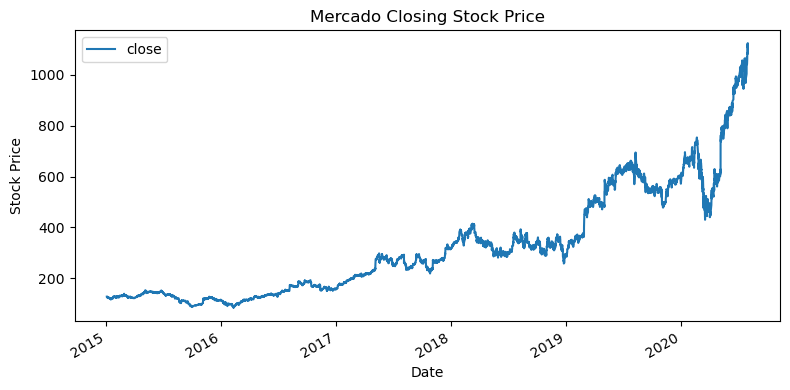

In [16]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot(title='Mercado Closing Stock Price', 
                               xlabel='Date',
                               ylabel='Stock Price',
                               figsize=[8, 4]
                               )




In [17]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

# Arnab's Comment: I have used the inner join to combine the two dataframes, 
# so that only the common dates are included in the combined dataframe
# There shouldn't be any NaN values in the combined dataframe
df_mercado_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1, join='inner')


# View the first and last five rows of the DataFrame
display ( df_mercado_combined.head(5) )
display ( df_mercado_combined.tail(5) )

# Check for the existence of  any NaN value in the DataFrame
df_mercado_combined.isna().sum()

,close,Search Trends
Date,,
2016-06-01 09:00:00,135.16,6
2016-06-01 10:00:00,136.63,12
2016-06-01 11:00:00,136.56,22
2016-06-01 12:00:00,136.42,33
2016-06-01 13:00:00,136.10,40


,close,Search Trends
Date,,
2020-07-31 11:00:00,1105.780,20
2020-07-31 12:00:00,1087.925,32
2020-07-31 13:00:00,1095.800,41
2020-07-31 14:00:00,1110.650,47
2020-07-31 15:00:00,1122.510,53


close            0
Search Trends    0
dtype: int64

#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [18]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_first_half_2020 = df_mercado_combined.loc['2020-01':'2020-06']


# View the first and last five rows of first_half_2020 DataFrame
display ( df_first_half_2020.head(5) )
display ( df_first_half_2020.tail(5) )


,close,Search Trends
Date,,
2020-01-02 09:00:00,601.085,9
2020-01-02 10:00:00,601.290,14
2020-01-02 11:00:00,615.410,25
2020-01-02 12:00:00,611.400,37
2020-01-02 13:00:00,611.830,50


,close,Search Trends
Date,,
2020-06-30 11:00:00,976.17,17
2020-06-30 12:00:00,977.50,27
2020-06-30 13:00:00,973.23,37
2020-06-30 14:00:00,976.50,45
2020-06-30 15:00:00,984.93,51


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

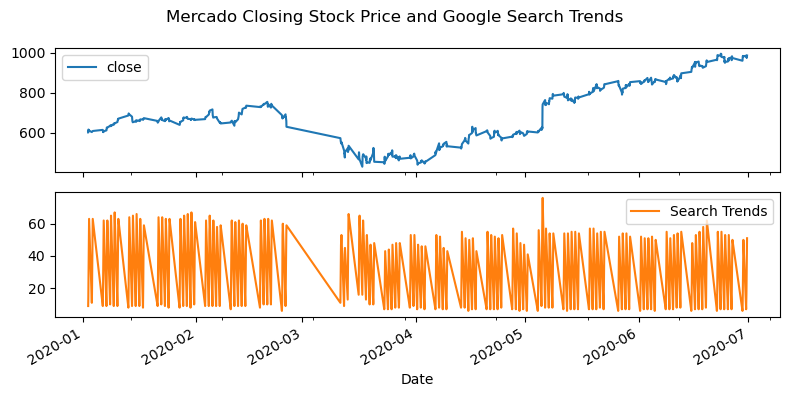

In [19]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_first_half_2020.plot(subplots=True, 
                        title='Mercado Closing Stock Price and Google Search Trends',
                        xlabel='Date'
                        )


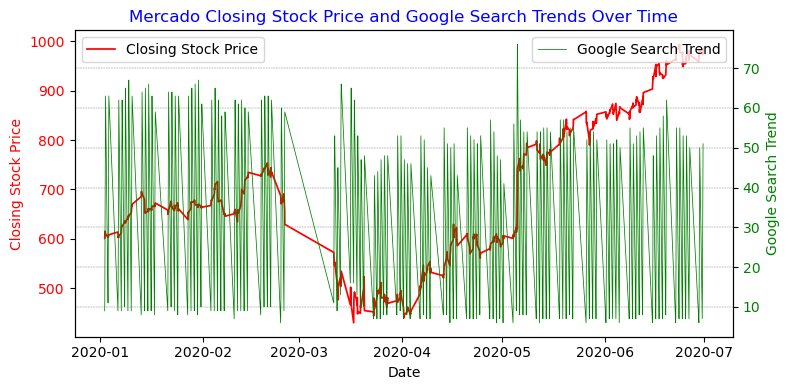

In [20]:
# Arnab's Comment: I have used subplots in another way to show the combined graph in a single plot
# I have used the twinx() function to show the combined graph in a single plot with two y-axis
# I have also used the legend to show the labels for the two y-axis

# Showing the combined graph in a single plot with two y-axis is more intutive  
# and helps in better visulization of the relationship between the two variables

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting Avg. Stock Price on the first y-axis (left)
ax1.plot(df_first_half_2020.index, df_first_half_2020['close'], label='Closing Stock Price', color="red", linewidth=1.25)
ax1.set_ylabel('Closing Stock Price', color='red')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left') 

# Plotting Avg. Stock Volume on the 2nd y-axis (Right)
ax2 = ax1.twinx()
ax2.plot(df_first_half_2020.index, df_first_half_2020['Search Trends'], label='Google Search Trend', color="green", linewidth=.55)
ax2.set_ylabel('Google Search Trend', color='green')
ax2.tick_params(axis='y', labelcolor='green') 
ax2.legend(loc='upper right') 

plt.title('Mercado Closing Stock Price and Google Search Trends Over Time', color='blue')
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.tight_layout()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In truth, our evidence of a common trend between search activity and stock price is pretty limited. It does appear generally however that the low point for Mercado Libre's stock price, late March to early April, did coincide with lower search activity for the firm. Search activity does pick up along with its stock price, although the stock price from mid-April onward definitively outpaces search interest.

There's one important thing to note: if you zoom in both graphs to the spike around May 5th, 2020, you'll find the date of the company's earnings release to the public. It looks like search traffic for the firm spiked about two hours before the firm's stock price spiked. This could indicate a predictable pattern (can Google Searches predict the stock price?), but an alternative explanation might just be that people tend to search for more information about the firm right before an earnings announcement gets released. We'd need to do a little more time-series research to see which explanation best fits the data.

In [21]:
# Filter the df_first_half_2020 DataFrame for May 5th 2020
df_may_5_2020 = df_first_half_2020.loc['2020-05-05']
display(df_may_5_2020)

,close,Search Trends
Date,,
2020-05-05 09:00:00,623.395,9
2020-05-05 10:00:00,613.390,13
2020-05-05 11:00:00,621.700,24
2020-05-05 12:00:00,622.380,38
2020-05-05 13:00:00,625.865,49
2020-05-05 14:00:00,628.240,61
2020-05-05 15:00:00,620.805,66
2020-05-05 16:00:00,726.990,70
2020-05-05 17:00:00,741.120,76


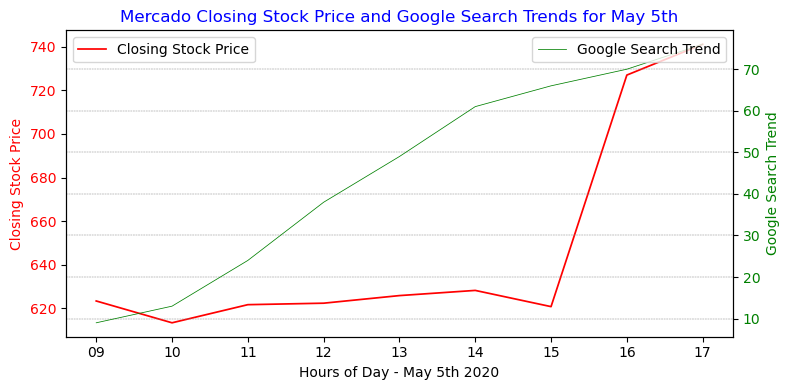

In [22]:
# Plot the close and Search Trends data for May 5th 2020 in a single plot with two y-axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting Avg. Stock Price on the first y-axis (left)
ax1.plot(df_may_5_2020.index, df_may_5_2020['close'], label='Closing Stock Price', color="red", linewidth=1.25)
ax1.set_ylabel('Closing Stock Price', color='red')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax1.set_xlabel('Hours of Day - May 5th 2020')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Plotting Avg. Stock Volume on the 2nd y-axis (Right)
ax2 = ax1.twinx()
ax2.plot(df_may_5_2020.index, df_may_5_2020['Search Trends'], label='Google Search Trend', color="green", linewidth=.55)
ax2.set_ylabel('Google Search Trend', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title('Mercado Closing Stock Price and Google Search Trends for May 5th', color='blue')
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.35)
plt.tight_layout()

# Conclusion: Firm's stock price spike started at 3PM on May 5th 2020, 
# however, the search trend started to increase from 10AM as per the graph

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [23]:
# Create a new column called Lagged Search Trends
# This column should shift the Search Trends information by one hour 

# Arnab's Comment: use a combination of the groupby method with the shift method to create the lagged column
# so that 'Lagged Search Trends' gets reset to NaN for the first hour of each day
df_mercado_combined['Lagged Search Trends'] = df_mercado_combined.groupby(df_mercado_combined.index.date)['Search Trends'].shift(1)

df_mercado_combined.head(10)


,close,Search Trends,Lagged Search Trends
Date,,,
2016-06-01 09:00:00,135.16,6,NaN
2016-06-01 10:00:00,136.63,12,6.0
2016-06-01 11:00:00,136.56,22,12.0
2016-06-01 12:00:00,136.42,33,22.0
2016-06-01 13:00:00,136.10,40,33.0
2016-06-01 14:00:00,137.03,45,40.0
2016-06-01 15:00:00,136.27,48,45.0
2016-06-02 09:00:00,136.00,7,NaN
2016-06-02 10:00:00,136.83,14,7.0


In [24]:
# Create a new column in the df_mercado_combined DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data 
# over a 4 period rolling window
df_mercado_combined['Stock Volatility'] = df_mercado_combined['close'].pct_change().rolling(window=4).std()

df_mercado_combined.head(10)



,close,Search Trends,Lagged Search Trends,Stock Volatility
Date,,,,
2016-06-01 09:00:00,135.16,6,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,NaN
2016-06-01 11:00:00,136.56,22,12.0,NaN
2016-06-01 12:00:00,136.42,33,22.0,NaN
2016-06-01 13:00:00,136.10,40,33.0,0.006134
2016-06-01 14:00:00,137.03,45,40.0,0.004137
2016-06-01 15:00:00,136.27,48,45.0,0.005257
2016-06-02 09:00:00,136.00,7,NaN,0.005309
2016-06-02 10:00:00,136.83,14,7.0,0.006091


<Axes: title={'center': 'Mercado Stock Volatility'}, xlabel='Date', ylabel='Stock Volatility'>

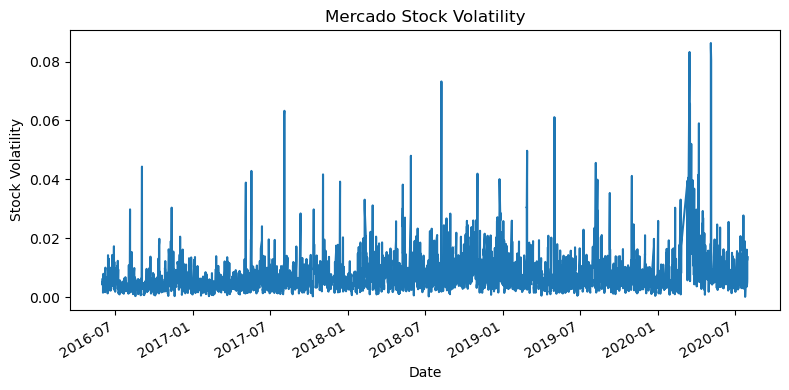

In [25]:
# Visualize the stock volatility
df_mercado_combined['Stock Volatility'].plot(title='Mercado Stock Volatility',
                                            xlabel='Date',
                                            ylabel='Stock Volatility',
                                            figsize=[8, 4]
                                            )

<Axes: title={'center': 'Mercado Stock Volatility for 2019, 2020 & 2021'}, xlabel='Date', ylabel='Stock Volatility'>

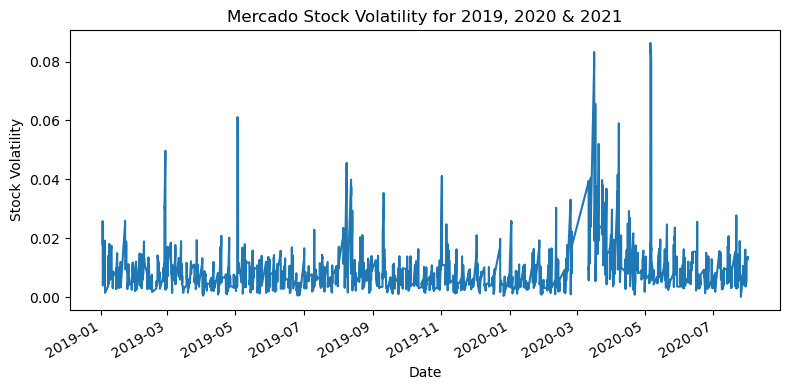

In [26]:
# Visualize the stock volatility on Years 2019, 2020 & 2021, for better focus on the trend
df_mercado_combined['Stock Volatility'].loc['2019':'2021'].plot(title='Mercado Stock Volatility for 2019, 2020 & 2021',
                                            xlabel='Date',
                                            ylabel='Stock Volatility',
                                            figsize=[8, 4]
                                            )

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [27]:
# Create a new column in the df_mercado_combined DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_mercado_combined['Hourly Stock Return'] = df_mercado_combined['close'].pct_change()

# View the first and last five rows of the mercado_stock_trends_df DataFrame
display ( df_mercado_combined.head(5) )
display ( df_mercado_combined.tail(5) )

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Date,,,,,
2016-06-01 09:00:00,135.16,6,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
Date,,,,,
2020-07-31 11:00:00,1105.780,20,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [28]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_combined[ ['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return'] ].corr()



,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.217431,0.061424
Lagged Search Trends,-0.217431,1.000000,-0.003556
Hourly Stock Return,0.061424,-0.003556,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** If we read down the second column (or read along the second row), we see that there's a slight negative correlation between searches for the firm and its subsequent stock volatility. More searches (slightly) tend to indicate less near-term hourly stock risk for the firm.

On the other hand, there's a positive correlation between search activity in one hour and stock returns in the next: as search activity goes up, so will the firm's stock price in the short term. This effect is very weak though, only half the size of the effect on stock volatility. With the correlation so close to zero, some might also say that there's almost no relationship between these two variables whatsoever, and that the small findings that we do have could be just due to chance. While there's no required threshold when looking at correlation between stock returns and the variables used to predict them, it does tend to be that correlations in this context tend to be very low across the board. It's hard to predict the market!

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [29]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

#Arnab's Comment: Copy the data to a new dataframe and then reset the index
df_mercado_trends_current = df_mercado_trends.copy()
df_mercado_trends_current.reset_index(inplace=True)


In [30]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends_current.columns = ['ds', 'y']


# Drop an NaN values from the prophet_df DataFrame
# Arnab's Comment: Check for the existence of NaN values in the dataframe
df_mercado_trends_current.isna().sum()
# Result: No NaN values in the dataframe

df_mercado_trends_current

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38
...,...,...
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97


In [31]:
# Call the Prophet function, store as an object
mercado_model = Prophet()


In [32]:
# Fit the time-series model.
mercado_model.fit(df_mercado_trends_current)


16:57:21 - cmdstanpy - INFO - Chain [1] start processing
16:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
df_mercado_trends_future = mercado_model.make_future_dataframe(periods=2000, freq='H')



# View the last five rows of the future_mercado_trends DataFrame
df_mercado_trends_future


,ds
0,2016-06-01 00:00:00
1,2016-06-01 01:00:00
2,2016-06-01 02:00:00
3,2016-06-01 03:00:00
4,2016-06-01 04:00:00
...,...
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00


In [34]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
df_mercado_predictions = mercado_model.predict(df_mercado_trends_future)

# Display the first five rows of the forecast_mercado_trends DataFrame
df_mercado_predictions.head(5)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.34325,80.930165,97.478119,44.34325,44.34325,45.270162,45.270162,45.270162,41.452720,...,1.860453,1.860453,1.860453,1.956988,1.956988,1.956988,0.0,0.0,0.0,89.613412
1,2016-06-01 01:00:00,44.34421,77.555393,94.205700,44.34421,44.34421,41.715959,41.715959,41.715959,37.943554,...,1.810360,1.810360,1.810360,1.962045,1.962045,1.962045,0.0,0.0,0.0,86.060169
2,2016-06-01 02:00:00,44.34517,67.961191,84.134912,44.34517,44.34517,31.392470,31.392470,31.392470,27.656623,...,1.768776,1.768776,1.768776,1.967071,1.967071,1.967071,0.0,0.0,0.0,75.737640
3,2016-06-01 03:00:00,44.34613,52.128185,68.641213,44.34613,44.34613,16.125251,16.125251,16.125251,12.417394,...,1.735792,1.735792,1.735792,1.972065,1.972065,1.972065,0.0,0.0,0.0,60.471381
4,2016-06-01 04:00:00,44.34709,35.291865,52.204455,44.34709,44.34709,-0.989628,-0.989628,-0.989628,-4.678022,...,1.711366,1.711366,1.711366,1.977027,1.977027,1.977027,0.0,0.0,0.0,43.357462


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

c:\Users\arnab\anaconda3\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\arnab\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


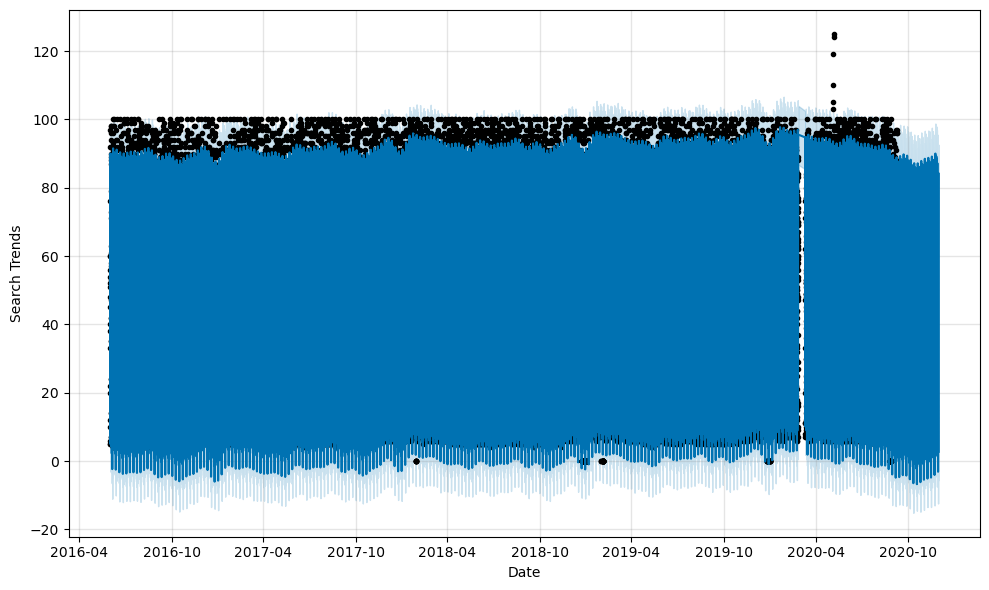

In [35]:
# Plot the Prophet predictions for the Mercado trends data
fig = mercado_model.plot(df_mercado_predictions, xlabel='Date', ylabel='Search Trends', figsize=(10, 6))

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** As per the above graph, the near-term forecast for the popularity of MercadoLibre is trending southwards.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [36]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
df_mercado_predictions.set_index('ds', inplace=True)
df_mercado_predictions

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
df_mercado_predictions[['yhat', 'yhat_lower', 'yhat_upper']]


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.613412,80.930165,97.478119
2016-06-01 01:00:00,86.060169,77.555393,94.205700
2016-06-01 02:00:00,75.737640,67.961191,84.134912
2016-06-01 03:00:00,60.471381,52.128185,68.641213
2016-06-01 04:00:00,43.357462,35.291865,52.204455
...,...,...,...
2020-11-30 04:00:00,39.612353,30.842472,47.966461
2020-11-30 05:00:00,24.141199,15.735653,32.580662
2020-11-30 06:00:00,12.175507,3.530383,21.375526


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: title={'center': 'Mercado Search Trends Forecast for the Last 2000 Hours'}, xlabel='Date', ylabel='Search Trends Forecast'>

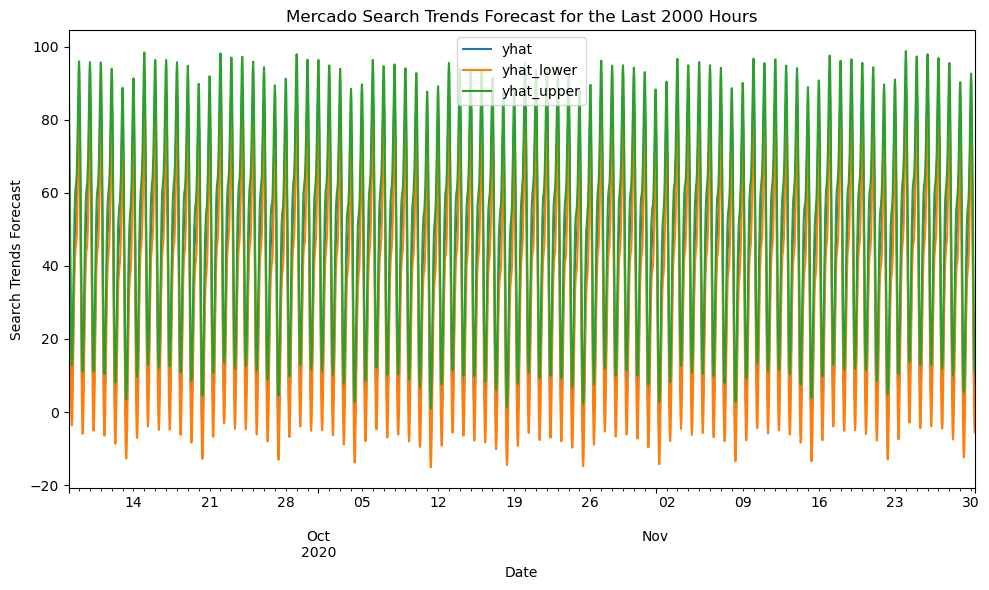

In [37]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
df_mercado_predictions[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot(
    title='Mercado Search Trends Forecast for the Last 2000 Hours',
    xlabel='Date',
    ylabel='Search Trends Forecast',
    figsize=(10, 6)
    )


c:\Users\arnab\anaconda3\Lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\arnab\anaconda3\Lib\site-packages\prophet\plot.py:395: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\arnab\anaconda3\Lib\site-packages\prophet\plot.py:399: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, ca

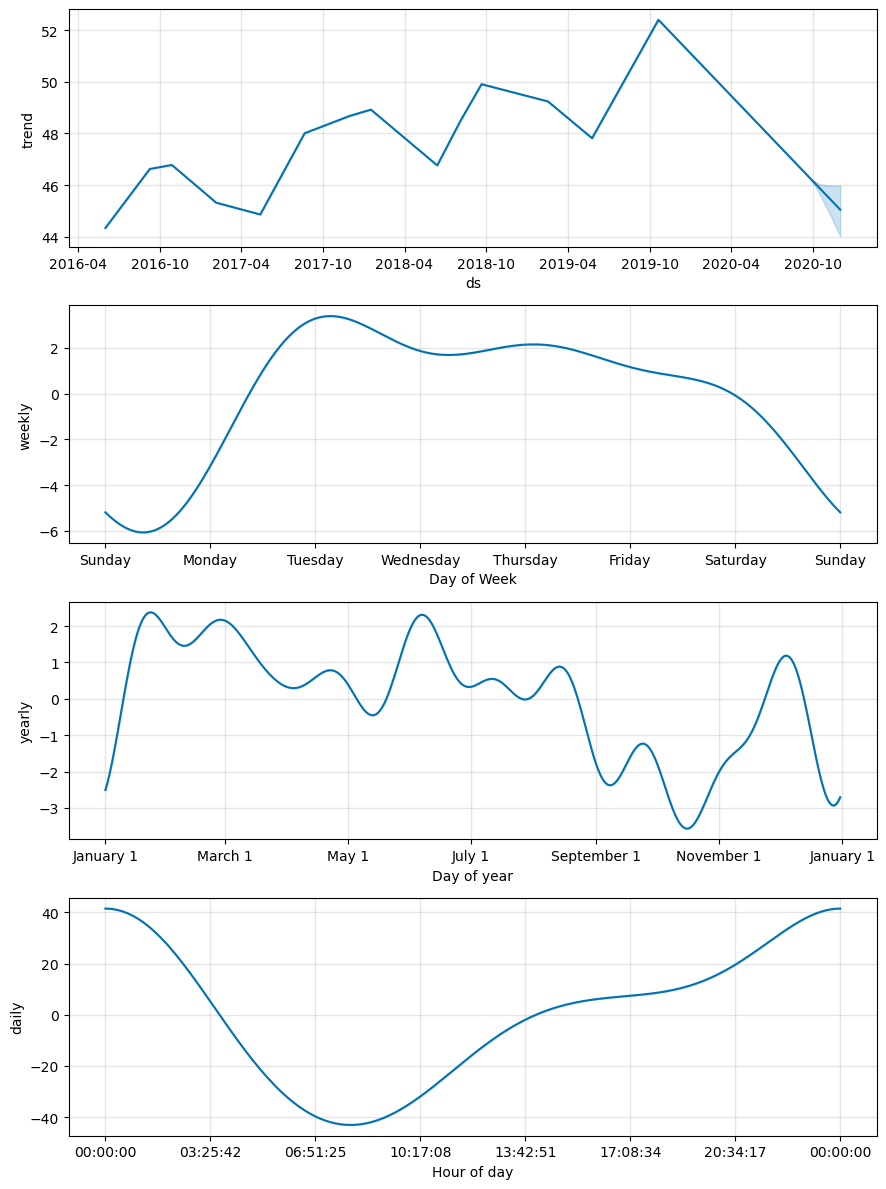

In [38]:
# Reset the index in the forecast_mercado_trends DataFrame
df_mercado_predictions.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results 
# for the forecast DataFrame 
fig = mercado_model.plot_components(df_mercado_predictions) 


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The greatest popularity is predicted to be at midnight.

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Tuesday is the day with most traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** Lowest point for search traffic in the calendar year is Mid October
where it reaches below -3 (-3.57) as shown below


In [39]:
# Set the index of the DataFrame again to the 'ds' column
df_mercado_predictions.set_index('ds', inplace=True)

# Group df_mercado_predictions by index to find the minimum value of 'yearly' for each year
print ( df_mercado_predictions.groupby(df_mercado_predictions.index.year)['yearly'].idxmin() )

# Group the DataFrame to find the minimum value of 'yearly_lower'
print ( df_mercado_predictions.groupby(df_mercado_predictions.index.year)['yearly'].min() )

ds
2016   2016-10-15 20:00:00
2017   2017-10-16 02:00:00
2018   2018-10-16 08:00:00
2019   2019-10-16 14:00:00
2020   2020-10-15 20:00:00
Name: yearly, dtype: datetime64[ns]
ds
2016   -3.570513
2017   -3.570513
2018   -3.570513
2019   -3.570513
2020   -3.570513
Name: yearly, dtype: float64
